### inport required library

In [60]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer

### Read data and show infor

In [80]:
data = pd.read_csv("../Data/cars_synth_clean.csv")
data.head()

,type,color,year,length,condition,width,weight,price
0,SUV,Black,2022,3.33,Poor,2.172119,3220,11621
1,SUV,Black,2022,3.44,Average,2.050049,3588,11795
2,Standard,Green,2018,3.21,Good,2.485968,3105,8811
3,Standard,Green,2013,3.07,Average,2.940257,3069,5995
4,SUV,Purple,2022,3.20,Good,2.123088,3349,12073


In [81]:
data.columns

Index(['type', 'color', 'year', 'length', 'condition', 'width', 'weight',
       'price'],
      dtype='object')

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   type       1000 non-null   object 
 1   color      1000 non-null   object 
 2   year       1000 non-null   int64  
 3   length     1000 non-null   float64
 4   condition  1000 non-null   object 
 5   width      1000 non-null   float64
 6   weight     1000 non-null   int64  
 7   price      1000 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [83]:
data.describe()

,year,length,width,weight,price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000
mean,2019.16200,3.145000,2.295049,3138.289000,10186.74100
std,5.29753,0.178775,0.297817,305.489983,3592.23225
min,1954.00000,2.740000,0.014319,2114.000000,3738.00000
25%,2018.00000,3.000000,2.090694,2911.750000,7755.00000
50%,2021.00000,3.150000,2.228019,3134.000000,9674.50000
75%,2022.00000,3.280000,2.471600,3347.000000,12024.00000
max,2023.00000,3.660000,3.156729,4072.000000,28212.00000


### Explore data

<Axes: xlabel='length', ylabel='price'>

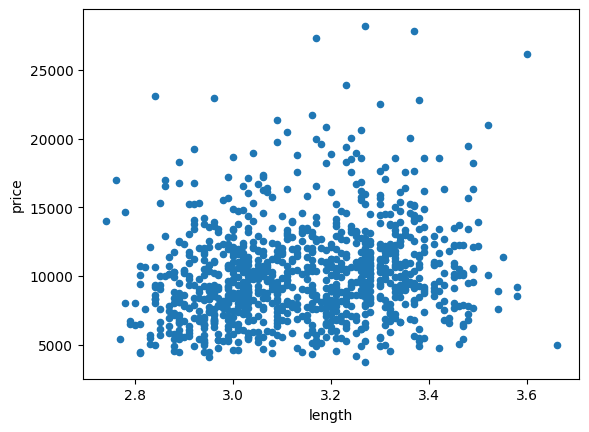

In [84]:
data.plot(kind="scatter", x="length", y="price")

<Axes: xlabel='width', ylabel='price'>

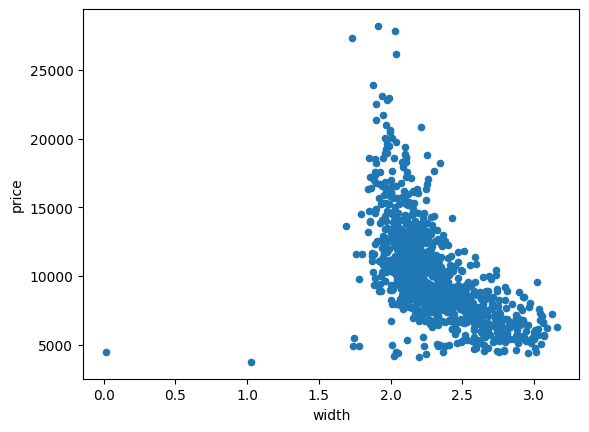

In [85]:
data.plot(kind="scatter", x="width", y="price")

<Axes: xlabel='weight', ylabel='price'>

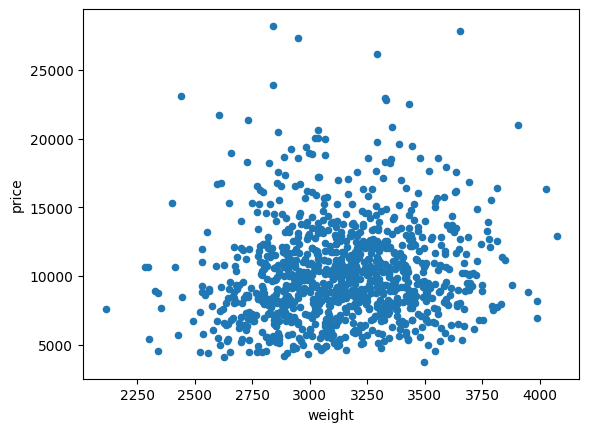

In [86]:
data.plot(kind="scatter", x="weight", y="price")

### Preparing the dataset
### Split data to train set and test set 

In [87]:
X = data[["type", "color", "year", "length", "condition",  "width", "weight"]].values
X

array([['SUV', 'Black', 2022, ..., 'Poor', 2.172119392417982, 3220],
       ['SUV', 'Black', 2022, ..., 'Average', 2.050048610052912, 3588],
       ['Standard', 'Green', 2018, ..., 'Good', 2.485968194662138, 3105],
       ...,
       ['SUV', 'Red', 2020, ..., 'Average', 2.244774645348273, 3316],
       ['Standard', 'Black', 2006, ..., 'Poor', 2.786734549829521, 3048],
       ['Standard', 'Black', 2010, ..., 'Good', 2.738422450260335, 3390]],
      dtype=object)

In [88]:
y = data[["price"]].values
y

array([[11621],
       [11795],
       [ 8811],
       [ 5995],
       [12073],
       [10584],
       [ 7518],
       [ 9480],
       [15266],
       [12833],
       [ 8876],
       [ 9686],
       [ 8950],
       [ 9427],
       [ 9570],
       [ 8593],
       [ 6828],
       [10500],
       [ 9981],
       [12338],
       [10971],
       [ 6373],
       [ 8392],
       [ 9706],
       [ 9192],
       [12726],
       [11796],
       [13659],
       [ 9513],
       [ 9900],
       [ 8076],
       [ 8450],
       [ 9221],
       [ 7339],
       [11434],
       [ 5299],
       [ 9989],
       [ 6787],
       [18944],
       [14730],
       [ 6742],
       [ 8316],
       [13602],
       [18568],
       [ 9084],
       [ 8251],
       [ 9142],
       [12134],
       [ 5517],
       [13855],
       [ 9212],
       [ 5221],
       [12569],
       [ 7195],
       [13003],
       [15345],
       [ 9036],
       [ 8258],
       [10105],
       [10623],
       [ 6963],
       [ 5601],
       [

In [89]:
X_train, X_test, price_train, price_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("Size of X_train: ", X_train.shape)
print("Size of price_train: ", price_train.shape)
print("Size of X_test: ", X_test.shape)
print("Size of price_test: ", price_test.shape)

Size of X_train:  (670, 7)
Size of price_train:  (670, 1)
Size of X_test:  (330, 7)
Size of price_test:  (330, 1)


In [90]:
data_train = pd.DataFrame(X_train, columns=("type", "color", "year", "length", "condition", "width", "weight"))
data_train["price"] = price_train
data_train.head()

,type,color,year,length,condition,width,weight,price
0,Standard,Green,2023,2.86,Good,1.886927,3396,16967
1,Standard,Green,2023,3.09,Good,2.038747,3294,19785
2,Standard,Purple,2022,2.9,Poor,2.034232,2803,7962
3,Standard,Red,2017,2.96,Average,2.558387,2885,7133
4,SUV,Black,2022,3.33,Poor,2.172119,3220,11621


In [91]:
data_test = pd.DataFrame(X_test, columns=("type", "color", "year", "length", "condition", "width", "weight"))
data_test["price"] = price_test
data_test.head()

,type,color,year,length,condition,width,weight,price
0,SUV,Green,2023,3.21,Average,1.98758,2735,11963
1,Standard,Red,2022,3.1,Average,2.026626,2953,14391
2,Standard,Purple,2021,2.88,Poor,2.209759,2826,7275
3,Standard,Black,2022,3.0,Good,2.159958,2835,12036
4,SUV,Green,2021,3.3,Poor,2.275055,3134,9380


### Linear Regression
- Train a linear regression using only the column length to predict the price . You should use the
LinearRegression class from sklearn library. Use method fit to train the model, and predict to get prediction. Note: sklearn functions accept whole dataframes, but not columns/Series.

In [92]:
linear_model = LinearRegression()
linear_model.fit(data_train[["length"]], data_train[["price"]])

LinearRegression()

In [93]:
pred_linear_model = linear_model.predict(data_test[["length"]])

- Compute the scores we have seen (MSE, RMSE, MAE, R2), using corresponding functions in sklearn. Do it first by using the train set, and then using the test set. Compare the difference. How to interpret the MAE? Would you say it is a useful prediction? How to interpret the R2? Would you say it is a good prediction?


In [94]:
mse = mean_squared_error(pred_linear_model, data_test[["price"]].values)
print("Mean squared error: ", mse)
mas = mean_absolute_error(pred_linear_model, data_test[["price"]].values)
print("Mean absolute error: ", mas)
r_2 = r2_score(pred_linear_model, data_test[["price"]].values)
print("R2_score: ", r_2)

Mean squared error:  12837798.161242336
Mean absolute error:  2718.6008676911097
R2_score:  -21.055108494511458


- Re-run the code including the random samples several times. Check that the values change signifi- cantly
- To get a more intuitive idea of the performance, plot the relation between the target variable and the prediction (e.g., seaborn scatterplot, x=target variable, y=your prediction). With a perfect prediction, you should observe a diagonal line.

In [95]:
data_test_pred = data_test.copy()
data_test_pred["pred"] = pred_linear_model

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='price', ylabel='pred'>

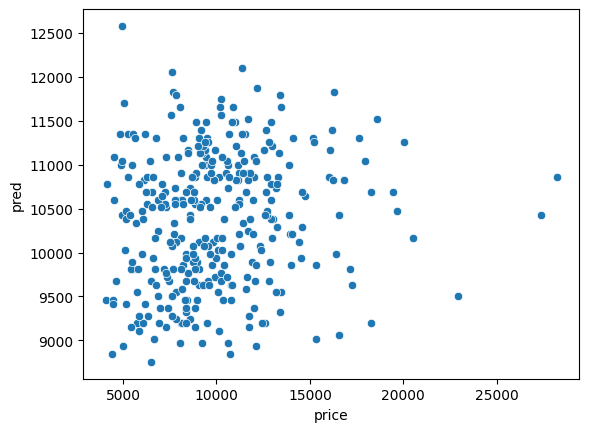

In [96]:
sns.scatterplot(data=data_test_pred, x="price", y="pred")

#### Feature Engineering
- Make a scatterplot showing the relation between age and year . Observe that there is a non-linear relationship. Find a way to make it mostly linear (you will need to use a log, but also remember the ratio/interval distinction...).

In [97]:
data["age"] = (2023 - data[["year"]])
data.head()

,type,color,year,length,condition,width,weight,price,age
0,SUV,Black,2022,3.33,Poor,2.172119,3220,11621,1
1,SUV,Black,2022,3.44,Average,2.050049,3588,11795,1
2,Standard,Green,2018,3.21,Good,2.485968,3105,8811,5
3,Standard,Green,2013,3.07,Average,2.940257,3069,5995,10
4,SUV,Purple,2022,3.20,Good,2.123088,3349,12073,1


In [98]:
data.dtypes

type          object
color         object
year           int64
length       float64
condition     object
width        float64
weight         int64
price          int64
age            int64
dtype: object

In [99]:
data_1 = data.copy()
pd.get_dummies(data_1, dtype=float)

,year,length,width,weight,price,age,type_SUV,type_Standard,color_Black,color_Green,color_Purple,color_Red,color_White,condition_Average,condition_Good,condition_New Car,condition_Poor
0,2022,3.33,2.172119,3220,11621,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2022,3.44,2.050049,3588,11795,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2018,3.21,2.485968,3105,8811,5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2013,3.07,2.940257,3069,5995,10,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2022,3.20,2.123088,3349,12073,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2021,3.23,2.112164,2774,8367,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
996,2022,3.16,2.116423,3064,11171,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
997,2020,3.09,2.244775,3316,8709,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
998,2006,3.00,2.786735,3048,4620,17,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [126]:
data_2 = data.copy()

In [127]:
jobs_encoder = LabelBinarizer()
jobs_encoder.fit(data_2[["type"]])
transformed = jobs_encoder.transform(data_2[["type"]])

In [128]:
ohe_df = pd.DataFrame(transformed)
ohe_df.head()

,0
0,0
1,0
2,1
3,1
4,0


In [129]:
ohe_df = ohe_df.rename(columns={0: "type_encoded"})

In [130]:
ohe_df.head()

,type_encoded
0,0
1,0
2,1
3,1
4,0


In [131]:
data_2 = pd.concat([data_2, ohe_df], axis=1)
data_2.head()

,type,color,year,length,condition,width,weight,price,age,type_encoded
0,SUV,Black,2022,3.33,Poor,2.172119,3220,11621,1,0
1,SUV,Black,2022,3.44,Average,2.050049,3588,11795,1,0
2,Standard,Green,2018,3.21,Good,2.485968,3105,8811,5,1
3,Standard,Green,2013,3.07,Average,2.940257,3069,5995,10,1
4,SUV,Purple,2022,3.20,Good,2.123088,3349,12073,1,0


In [132]:
jobs_encoder = LabelBinarizer()
jobs_encoder.fit(data_2[["color"]])
transformed = jobs_encoder.transform(data_2[["color"]])
ohe_df = pd.DataFrame(transformed)
ohe_df = ohe_df.rename(columns={0: "color_encoded"})
data_2 = pd.concat([data_2, ohe_df], axis=1)
data_2.head()

,type,color,year,length,condition,width,weight,price,age,type_encoded,color_encoded,1,2,3,4
0,SUV,Black,2022,3.33,Poor,2.172119,3220,11621,1,0,1,0,0,0,0
1,SUV,Black,2022,3.44,Average,2.050049,3588,11795,1,0,1,0,0,0,0
2,Standard,Green,2018,3.21,Good,2.485968,3105,8811,5,1,0,1,0,0,0
3,Standard,Green,2013,3.07,Average,2.940257,3069,5995,10,1,0,1,0,0,0
4,SUV,Purple,2022,3.20,Good,2.123088,3349,12073,1,0,0,0,1,0,0
